# Assignment: Try different clustering methods

In this lesson you learned about K-Means clustering. Sometimes K-Means is not appropriate for your data. Create a notebook using data either from these lessons or from somewhere else (credit your source) and show a different clustering method NOT using K-Means. What did you learn?

# Agglomerative Hierarchical Clustering

## Introduction


Clustering is an example of unsupervised learning, in which no training samples are available from which to learn and create model. Fast and robust clustering algorithms play an important role in extracting useful information in large databases.

The aim of cluster analysis is to partition a set of N object into C clusters such that objects within cluster should be similar to each other and objects in different clusters should be dissimilar with each other.

Clustering is a popular algorithm in a variety of fields, including psychology, business and retail, computational biology, social media network analysis, and so on.

 In data mining, hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:
 1. Agglomerative: This is a "bottom up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
 2. Divisive: This is a "top down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy. 

This Notebook explains the idea of agglomerative clustering, the steps to perform it, and finally takes a customer segmentation dataset to cluster clients of a wholesale distributor based on their annual spending on diverse product categories.

 ## Hierarchical and K-Means Clustering Algorithms

The advantage of hierarchical clustering over k-means clustering is that it’s easy to implement and outputs a hierarchy, that is, a structure that is more informative than the unstructured sets of flat clusters returned by k-means. Therefore, it is easier to decide on the number of clusters by looking at the dendogram.

Moreover, the advantage of not having to predefine the number of clusters gives it quite an edge over k-Means. However, hierarchical clustering is not suitable for large data sets due to its time complexity, and is also sensitive to outliers

## Agglomerative Hierarchical Clustering
In Clustering, one of the most widely used algorithms is agglomerative algorithms. A bottom-up method in which each entity represents its own cluster, which is then iteratively merged until the desired cluster structure is achieved. 

This N-sample algorithm starts with N clusters, each containing a single sample. Following that, two clusters with the greatest similarity will combine until the number of clusters is reduced to one or the user specifies.

The steps for forming agglomerative (bottom-up) clustering are:
1. Start by considering each data point as its own singleton cluster.
2. After each iteration of calculating Euclidian distance, merge two clusters with minimum distance.
3. Stop when there is a single cluster of all examples, else go to step 2

Suppose there are 4 data points. We will assign each of these points to a cluster and hence will have 4 clusters in the beginning:

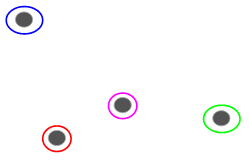

Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left:

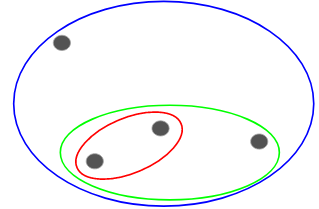

## Customer segmentation using hierarchical clustering in python 
We will be working on a wholesale customer segmentation problem. The data is hosted on the UCI Machine Learning repository. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, etc.

### Data Description 
Wholesale customer dataset consists of 440 instances and eight (8) attributes that include Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_paper and Delicassen. 

### Data Exploration
Let’s explore the data first and then apply Hierarchical Clustering to segment the clients. We will first import the required libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load the data and look at the first few rows:

In [2]:
data = pd.read_csv('data/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### Data Normalization
But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table). So, let’s first normalize the data and bring all the variables to the same scale:

In [3]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Here, we can see that the scale of all the variables is almost similar. Now, we are good to go. Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem.

### Dendogram
Dendogram is a tree-like diagram that records the sequence of merges or splits. To get the number of clusters for hierarchical clustering we use the concept of dendogram.

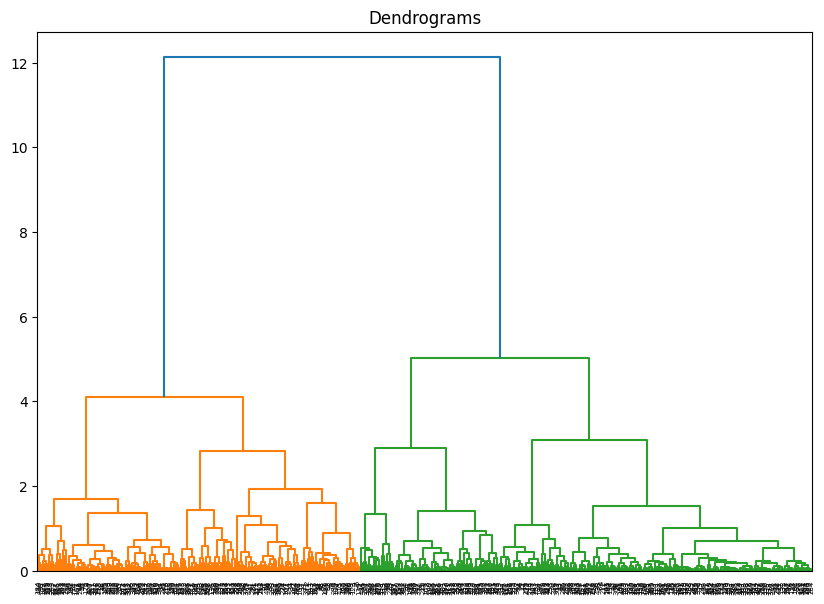

In [5]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram:

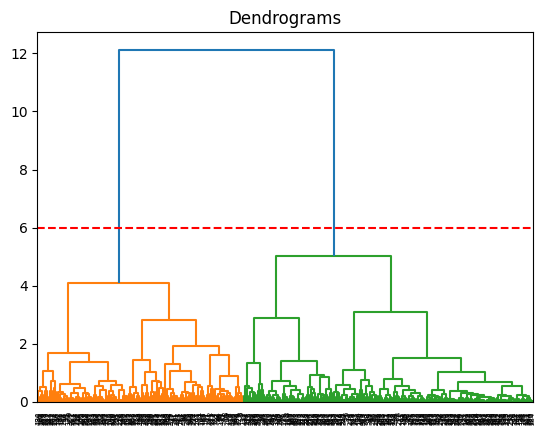

In [6]:
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

We have two clusters, as this line cuts the dendrogram at two points. Let’s now apply hierarchical clustering for 2 clusters:

In [8]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

c:\Users\This Pc\Desktop\Arewa Datascience\ArewaDS-Machine-Learning-Assignments\ADS_env\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

We can see the values of 0s and 1s in the output since we defined 2 clusters. 0 represents the points that belong to the first cluster and 1 represents points in the second cluster. Let’s now visualize the two clusters:

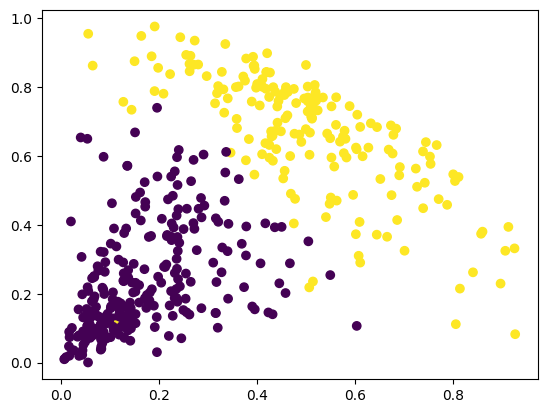

In [9]:
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

Awesome! We can clearly visualize the two clusters here.

## Conclusion
 Hierarchical clustering is a super useful way of segmenting observations. The advantage of not having to pre-define the number of clusters gives it quite an edge over k-Means. However, hierarchical clustering is not suitable for large data sets due to its time complexity, and is also sensitive to outliers.

## Reference

Chris ding and Xiaofeng He (2002), Cluster Merging And Splitting In Hierarchical Clustering
Algorithms.

K.Sasirekha, P.Baby, “Agglomerative Hierarchical Clustering- A Review”, International Journal
of Scientific and Research Publications, Volume 3, Issue 3, March 2013 1 ISSN 2250-3153

Marina Santini, “Advantages & Disadvantages of k-Means and Hierarchical Clustering”,
Department of Linguistics and Philology Uppsala University

MarjanKuchaki Rafsanjani, Zahra Asghari Varzaneh, Nasibeh Emami Chukanlo (2012),
A survey of hierarchical clustering algorithms, The Journal of Mathematics and
Computer Science, 5,.3, pp.229- 240.

M.S.Yang,” A Survey of hierarchical clustering” Mathl. Comput. Modelling Vol. 18, No. 11,
pp. 1-16, 1993.

Pranav Shetty, Suraj Singh, “Hierarchical Clustering: A survey”, International Journal of
Applied Research 2021; 7(4): 178-181 Pulkit, S. (2019, May 27).

A Beginner’s Guide to Clustering and how to perform it in Python. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical- clustering/

Tian Zhang, Raghu Ramakrishnan, MironLinvy (1996), BIRCH: an efficient data clustering
method for large databases, International Conference on Management of Data, In Proc. of 1996 ACM-SIGMOD Montreal, Quebec.

Sudipto Guha, Rajeev Rastogi, Kyuseok Shim (1998), CURE: An Efficient Clustering Algorithm
For Large